In [ ]:
from PIL import Image
import tensorflow as tf
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

The above few lines of code set up TensorFlow to work with the available GPUs. The tf.config.experimental.list_physical_devices() function is used to get a list of all available physical devices on the system, including the GPUs. The function takes a device type as an argument, and in this case, it is set to 'GPU' to list all available GPUs.

The code then loops through each available GPU and sets the memory growth option to True for each. tf.config.experimental.set_memory_growth() function is used for this. The set_memory_growth function is used to allocate GPU memory on an as-needed basis. This option is useful when working with large models that may not fit into the available memory on the GPU. By setting set_memory_growth to True, TensorFlow will allocate memory on the GPU as needed instead of reserving it all at once.

Overall, this code ensures that TensorFlow is set up to use the available GPUs efficiently by allowing it to allocate memory on an as-needed basis, which can be beneficial when working with large models that may not fit into GPU memory.

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive


In [100]:
#Making Emotion_folder of Training Data and Test Data
import os
parent_dir_test='/content/drive/MyDrive/TESS Toronto emotional speech set data/Test Data'
output_dir_test='/content/drive/MyDrive/Image_Output_folder/Test Data'

parent_dir_train='/content/drive/MyDrive/TESS Toronto emotional speech set data/Training Data'
output_dir_train='/content/drive/MyDrive/Image_Output_folder/Training Data'

emotion_folder_test=[]
for i in os.listdir(parent_dir_test):
  emotion_folder_test.append(i)

emotion_folder_train=[]
for i in os.listdir(parent_dir_train):
  emotion_folder_train.append(i)


In [101]:
print(emotion_folder_test)
emotion_folder_train

['YAF_angry', 'YAF_disgust', 'YAF_fear', 'YAF_happy', 'YAF_neutral', 'YAF_pleasant_surprised', 'YAF_sad']


['OAF_sad',
 'OAF_pleasant_surprise',
 'OAF_neutral',
 'OAF_angry',
 'OAF_happy',
 'OAF_disgust',
 'OAF_fear']

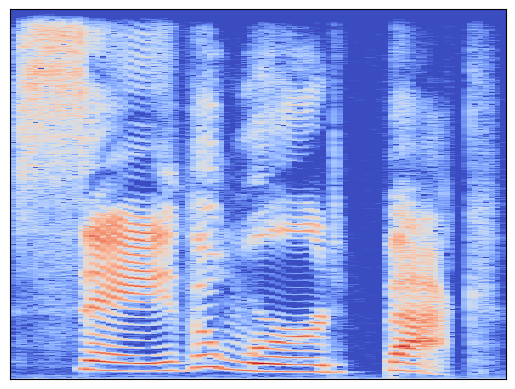

In [103]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
path='/content/drive/MyDrive/TESS Toronto emotional speech set data/Test Data/YAF_angry/YAF_back_angry.wav'
data,sr=librosa.load(path)
x=librosa.stft(data)
xdb=librosa.amplitude_to_db(abs(x))
fig=plt.figure()
librosa.display.specshow(xdb,sr=sr);

In [ ]:
#Execute the set of code to get colored/RGB Images.

import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
parent_dir='/content/drive/MyDrive/TESS Toronto emotional speech set data/Test Data'
output_dir='/content/drive/MyDrive/Image_Output_folder/Test Data'
for sub_dir in os.listdir(parent_dir):
  #Extracting audio files from Children Subdirectory
  for audio_file in os.listdir(os.path.join(parent_dir,sub_dir)):
    if audio_file.endswith('wav'):
      src_path=os.path.join(parent_dir,sub_dir,audio_file)
      dst_path=os.path.join(output_dir,sub_dir,os.path.splitext(audio_file)[0]+'.jpg')
      data,sr=librosa.load(src_path)
      #Compute Spectogram using librosa
      x=librosa.stft(data)
      xdb=librosa.amplitude_to_db(abs(x))
      #Plot spectogram using librosa
      fig=plt.figure()
      librosa.display.specshow(xdb,sr=sr)
      fig.savefig(dst_path,bbox_inches='tight')

In [ ]:
#Execute the set of code to get Black and White/Grayscale Images.
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from PIL import Image

parent_dir='/content/drive/MyDrive/TESS Toronto emotional speech set data/Test Data'
output_dir='/content/drive/MyDrive/Image_Output_folder/Test Data'

for sub_dir in os.listdir(parent_dir):
    # Create child directory for output images
    sub_dir_path = os.path.join(output_dir, sub_dir)
    os.makedirs(sub_dir_path, exist_ok=True)
    
    # Extract audio files from child subdirectory
    for audio_file in os.listdir(os.path.join(parent_dir, sub_dir)):
        if audio_file.endswith('wav'):
            src_path = os.path.join(parent_dir, sub_dir, audio_file)
            dst_path = os.path.join(sub_dir_path, os.path.splitext(audio_file)[0] + '.jpg')
            
            # Load audio data and compute spectrogram
            data, sr = librosa.load(src_path)
            spec = librosa.feature.melspectrogram(y=data, sr=sr)
            spec_db = librosa.power_to_db(spec)
            
            # Convert spectrogram to grayscale
            spec_gray = (255.0 / spec_db.max() * (spec_db - spec_db.min())).astype(np.uint8)
            spec_gray = Image.fromarray(spec_gray)
            
            # Save spectrogram as grayscale image
            spec_gray.save(dst_path)


In [104]:
#code executed to display the number of files in all the emotions folder
parent_dir='/content/drive/MyDrive/TESS Toronto emotional speech set data/Test Data'
output_dir='/content/drive/MyDrive/Image_Output_folder/Test Data'
temp_count=[]
for i in emotion_folder_test:
  temp_count.append(len(os.listdir(os.path.join(parent_dir,i))))

In [105]:
#Code is displaying number of files in all the emotions folder
import pandas as pd
temp_count
emotion_folder_test
pd.DataFrame([emotion_folder_test,temp_count]).transpose().rename(columns={0:"Emotions from Source",1:'Count'})

Emotions from Source Count
0               YAF_angry   200
1             YAF_disgust   200
2                YAF_fear   200
3               YAF_happy   200
4             YAF_neutral   200
5  YAF_pleasant_surprised   200
6                 YAF_sad   200

In [106]:
output_dir='/content/drive/MyDrive/Image_Output_folder/Training Data'
temp_count=[]
for i in emotion_folder_train:
  temp_count.append(len(os.listdir(os.path.join(output_dir,i))))

In [107]:
import pandas as pd
temp_count
emotion_folder_test
pd.DataFrame([emotion_folder_train,temp_count]).transpose().rename(columns={0:"Emotions from Source",1:'Count'})

Emotions from Source Count
0                OAF_sad   200
1  OAF_pleasant_surprise   200
2            OAF_neutral   200
3              OAF_angry   200
4              OAF_happy   200
5            OAF_disgust   200
6               OAF_fear   200

In [108]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, array_to_img, load_img
train_dataset=ImageDataGenerator(rescale=1/255)
#test_dataset=ImageDataGenerator(rescale=1/255,horizontal_flip=True,zoom_range=0.2,shear_range=0.2)
#train_dataset=ImageDataGenerator(rescale=1/255)
test_dataset=ImageDataGenerator(rescale=1/255)

In [109]:
test_path='/content/drive/MyDrive/Image_Output_folder/Test Data'
train_path='/content/drive/MyDrive/Image_Output_folder/Training Data'

In [110]:
train_data=train_dataset.flow_from_directory(train_path,target_size=(256,256),batch_size=16,class_mode="categorical",color_mode="rgb",seed=123)

test_data=test_dataset.flow_from_directory(test_path,target_size=(256,256),batch_size=16,class_mode="categorical",color_mode="rgb",seed=123)

Found 1400 images belonging to 7 classes.
Found 1400 images belonging to 7 classes.


In [111]:
test_data.class_indices

{'YAF_angry': 0,
 'YAF_disgust': 1,
 'YAF_fear': 2,
 'YAF_happy': 3,
 'YAF_neutral': 4,
 'YAF_pleasant_surprised': 5,
 'YAF_sad': 6}

In [112]:
from keras.layers import Dense, Conv2D, MaxPool2D, Activation, Flatten, Dropout
from keras.models import Sequential

In [113]:
old_model=Sequential()
#First Layer
old_model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(256,256,3)))
old_model.add(MaxPool2D())
#Second Layer
old_model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
old_model.add(MaxPool2D())
#Third Layer
old_model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
old_model.add(MaxPool2D())
#Fourth Layer
old_model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
old_model.add(MaxPool2D())
#Flatten Layer
old_model.add(Flatten())
old_model.add(Dense(units=64,activation='relu'))

#Final Layer
old_model.add(Dense(units=7,activation='softmax'))

 
#Copilation Layer
old_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [114]:
old_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 30, 30, 64)      

In [115]:
#Early stopping
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2)

#model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[early_stop])


The **EarlyStopping** callback takes two main arguments: **monitor** and **patience**. The **monitor** argument specifies the metric to monitor during training, which is set to **val_loss** in the given code. The validation loss is the loss calculated on the validation set during training. The **patience** argument specifies the number of epochs to wait before stopping the training process if there is no improvement in the monitored metric. In the given code, **patience** is set to 2, which means that if the validation loss does not improve for two consecutive epochs, the training process will be stopped early.

Early stopping is a useful technique in deep learning to prevent overfitting and to save time and computational resources. It stops the training process as soon as the model starts to overfit the training data and helps in generalizing the model to unseen data.

In [116]:
# Define early stopping callback
old_model_history=old_model.fit(train_data,batch_size=50,epochs=4,verbose=1,validation_data=test_data,callbacks=[early_stop])

Epoch 1/4
88/88 [==============================] - 16s 160ms/step - loss: 1.3467 - accuracy: 0.4900 - val_loss: 3.4685 - val_accuracy: 0.1857
Epoch 2/4
88/88 [==============================] - 17s 192ms/step - loss: 0.2667 - accuracy: 0.9129 - val_loss: 9.3197 - val_accuracy: 0.3036
Epoch 3/4
88/88 [==============================] - 13s 151ms/step - loss: 0.0710 - accuracy: 0.9757 - val_loss: 4.5671 - val_accuracy: 0.1857


In [117]:
len(old_model_history.history['loss'])

3

[1.3466657400131226, 0.2667127549648285, 0.07096666842699051]
[3.468470335006714, 9.319709777832031, 4.567097187042236]


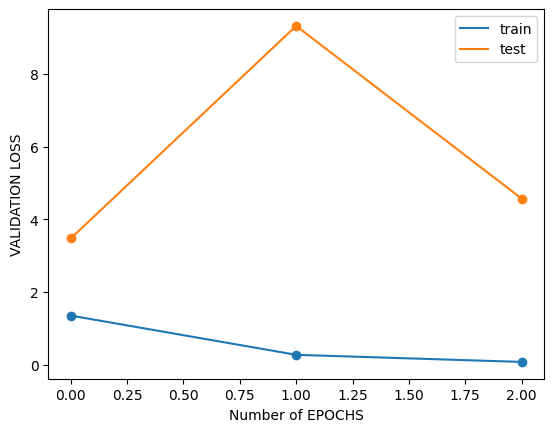

In [118]:
print(old_model_history.history['loss'])
print(old_model_history.history['val_loss'])
import matplotlib.pyplot as plt

plt.plot(old_model_history.history['loss'],label='train')
plt.scatter(range(len(old_model_history.history['loss'])),old_model_history.history['loss'])
plt.plot(old_model_history.history['val_loss'],label='test')
plt.scatter(range(len(old_model_history.history['val_loss'])),old_model_history.history['val_loss'])
plt.legend()
plt.xlabel("Number of EPOCHS")
plt.ylabel('VALIDATION LOSS');
#plt.legend();
#Label the plots for better understanding

In [119]:
true_emotions=[]
for i in range(7):
  true_emotions.append(list(test_data.class_indices.keys())[i].split("_")[1])
true_emotions

['angry', 'disgust', 'fear', 'happy', 'neutral', 'pleasant', 'sad']

1/1 [==============================] - 0s 87ms/step
Emotion Detected= ANGRY


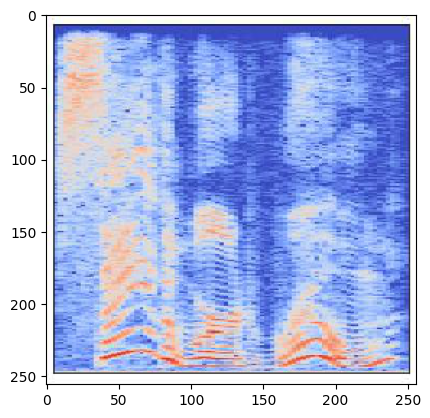

In [120]:
#Predicting the New Image
import numpy as np
import matplotlib.pyplot as plt
path="/content/drive/MyDrive/Image_Output_folder/Test Data/YAF_pleasant_surprised/YAF_room_ps.jpg"

original=load_img(path,target_size=(256,256))
img=load_img(path,target_size=(256,256))

#Preprocessing the Image

pre_img=img_to_array(img)
pre_img=pre_img/255
pre_img=np.expand_dims(pre_img,axis=0)

#Predicting the Image
img_pred=old_model.predict(pre_img)
print("Emotion Detected=", true_emotions[img_pred.argmax()].upper())
plt.imshow(original);


In [ ]:
#Pickling the file
import pickle
with open('/content/drive/MyDrive/CNN Models/old_model.pkl', 'wb') as f:
    pickle.dump(old_model, f)

In [ ]:
#Loading the mode
import pickle
with open('/content/drive/MyDrive/CNN Models/old_model.pkl', 'rb') as f:
    old_model = pickle.load(f)

In [121]:
print(test_data.class_indices.keys())
img_pred.argmax()

dict_keys(['YAF_angry', 'YAF_disgust', 'YAF_fear', 'YAF_happy', 'YAF_neutral', 'YAF_pleasant_surprised', 'YAF_sad'])


0

#*Second Iteration*



In [ ]:
#For Removing existing files in Train folder and test folder
import os
emotion = ['sad', 'pleasant', 'neutral', 'angry', 'happy', 'disgust', 'fear']
test_path = "/content/drive/MyDrive/Test_Sample_Folder/Test Data"
train_path= "/content/drive/MyDrive/Test_Sample_Folder/Train Data"

"""for i in range(len(emotion)):
  folder_path = os.path.join(test_path, emotion[i])
  file_list = os.listdir(folder_path)
  for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)
    os.remove(file_path)
"""

###############################################################################################
"""
for i in range(len(emotion)):
  folder_path = os.path.join(train_path, emotion[i])
  file_list = os.listdir(folder_path)
  for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)
    os.remove(file_path)
"""

In [ ]:
#Check the total Number of Files in all the Emotions Folders
import os
import pandas as pd
test_path="/content/drive/MyDrive/Image_Output_folder/Test Data"
train_path="/content/drive/MyDrive/Image_Output_folder/Train Data"

#Making Emotion_folder of Training Data and Test Data

import os
parent_dir_test='/content/drive/MyDrive/TESS Toronto emotional speech set data/Test Data'
output_dir_test='/content/drive/MyDrive/Image_Output_folder/Test Data'

parent_dir_train='/content/drive/MyDrive/TESS Toronto emotional speech set data/Training Data'
output_dir_train='/content/drive/MyDrive/Image_Output_folder/Training Data'

emotion_folder_test=[]
for i in os.listdir(parent_dir_test):
  emotion_folder_test.append(i)

emotion_folder_train=[]
for i in os.listdir(parent_dir_train):
  emotion_folder_train.append(i)

#Creating a dictionary of Training Emotions, corresponding to file paths to check the total number of files in the data
import os
emotion_folder_test
path='/content/drive/MyDrive/Image_Output_folder/Test Data'
emotion_dir_test=dict()

# Initialize the value for each key as an empty list
for folder in emotion_folder_test:
  emotion_dir_test[folder] = []

# Append file paths to the corresponding list in the dictionary
for i in range(len(emotion_folder_test)):
  temp_folders=os.path.join(path,emotion_folder_test[i])
  for j in range(len(os.listdir(temp_folders))):
    temp_files=os.path.join(temp_folders,os.listdir(temp_folders)[j])
    emotion_dir_test[emotion_folder_test[i]].append(temp_files)

# Print the resulting dictionary
emotion_dir_test.keys()
pd.DataFrame(emotion_dir_test).isnull().sum()

YAF_angry                 0
YAF_disgust               0
YAF_fear                  0
YAF_happy                 0
YAF_neutral               0
YAF_pleasant_surprised    0
YAF_sad                   0
dtype: int64

In [ ]:
pd.DataFrame(emotion_dir_train).isnull().sum()

OAF_sad                  0
OAF_pleasant_surprise    0
OAF_neutral              0
OAF_angry                0
OAF_happy                0
OAF_disgust              0
OAF_fear                 0
dtype: int64

In [ ]:
emotion_dir_train.values()
for i in range(len(emotion_dir_train.keys())):
  print(len(emotion_dir_train[emotion_folder_train[i]]))

print("*****************************************")

for i in range(len(emotion_dir_test.keys())):
  print(len(emotion_dir_test[emotion_folder_test[i]]))

200
200
200
200
200
200
200
*****************************************
200
200
200
200
200
200
200


In [ ]:
emotion_dir_test["YAF_sad"][0]

'/content/drive/MyDrive/Image_Output_folder/Test Data/YAF_sad/YAF_food_sad.jpg'

In [ ]:
emotion_dir_train['OAF_sad'][0]

'/content/drive/MyDrive/Image_Output_folder/Training Data/OAF_sad/OAF_bite_sad.jpg'

In [ ]:
#By Executing this section of code, as an output you will receive just the file names with it's corresponding emotion as key
emotion_folder_train=['OAF_sad', 'OAF_pleasant_surprise', 'OAF_neutral', 'OAF_angry', 'OAF_happy', 'OAF_disgust', 'OAF_fear']
path_train='/content/drive/MyDrive/Image_Output_folder/Training Data'
emotion_dir_train=dict()
for i in emotion_folder_train:
  emotion_dir_train[i]=[]
print(emotion_dir_train)
os.listdir(os.path.join(path_train,emotion_folder_train[0]))
for i, j in enumerate(emotion_folder_train):
  for k,b in enumerate(os.listdir(os.path.join(path_train,emotion_folder_train[i]))):
    emotion_dir_train[j].append(b)


emotion_folder_test=['YAF_sad', 'YAF_pleasant_surprised', 'YAF_neutral', 'YAF_angry', 'YAF_happy', 'YAF_disgust', 'YAF_fear']
path_test='/content/drive/MyDrive/Image_Output_folder/Test Data'
emotion_dir_test=dict()
for i in emotion_folder_test:
  emotion_dir_test[i]=[]
os.listdir(os.path.join(path_test,emotion_folder_test[0]))
for w, j in enumerate(emotion_folder_test):
  for k,b in enumerate(os.listdir(os.path.join(path_test,emotion_folder_test[w]))):
    emotion_dir_test[j].append(b)

{'OAF_sad': [], 'OAF_pleasant_surprise': [], 'OAF_neutral': [], 'OAF_angry': [], 'OAF_happy': [], 'OAF_disgust': [], 'OAF_fear': []}


In [ ]:
emotion_dir_test.keys(),emotion_dir_train.keys()

(dict_keys(['YAF_sad', 'YAF_pleasant_surprised', 'YAF_neutral', 'YAF_angry', 'YAF_happy', 'YAF_disgust', 'YAF_fear']),
 dict_keys(['OAF_sad', 'OAF_pleasant_surprise', 'OAF_neutral', 'OAF_angry', 'OAF_happy', 'OAF_disgust', 'OAF_fear']))

In [ ]:
emotion_dir_test["YAF_sad"][0]

'YAF_food_sad.jpg'

In [ ]:
emotion_dir_train.values()
for i in range(len(emotion_dir_train.keys())):
  print(len(emotion_dir_train[emotion_folder_train[i]]))

print("*****************************************")

for i in range(len(emotion_dir_test.keys())):
  print(len(emotion_dir_test[emotion_folder_test[i]]))

200
200
200
200
200
200
200
*****************************************
200
200
200
200
200
200
200


In [ ]:
pd.DataFrame(emotion_dir_train).head()

OAF_sad OAF_pleasant_surprise            OAF_neutral  \
0    OAF_bite_sad.jpg       OAF_base_ps.jpg   OAF_bone_neutral.jpg   
1  OAF_bought_sad.jpg       OAF_back_ps.jpg  OAF_cheek_neutral.jpg   
2    OAF_calm_sad.jpg        OAF_bar_ps.jpg   OAF_deep_neutral.jpg   
3    OAF_bath_sad.jpg       OAF_bean_ps.jpg   OAF_book_neutral.jpg   
4    OAF_bean_sad.jpg       OAF_bath_ps.jpg    OAF_bar_neutral.jpg   

              OAF_angry            OAF_happy           OAF_disgust  \
0    OAF_boat_angry.jpg   OAF_calm_happy.jpg  OAF_date_disgust.jpg   
1  OAF_bought_angry.jpg  OAF_chalk_happy.jpg  OAF_germ_disgust.jpg   
2   OAF_chain_angry.jpg    OAF_dab_happy.jpg  OAF_chat_disgust.jpg   
3     OAF_bar_angry.jpg   OAF_base_happy.jpg   OAF_gas_disgust.jpg   
4   OAF_cause_angry.jpg  OAF_chain_happy.jpg   OAF_fit_disgust.jpg   

             OAF_fear  
0   OAF_boat_fear.jpg  
1   OAF_book_fear.jpg  
2   OAF_back_fear.jpg  
3   OAF_bath_fear.jpg  
4  OAF_chalk_fear.jpg

In [ ]:
pd.DataFrame(emotion_dir_test).head()

YAF_sad YAF_pleasant_surprised           YAF_neutral  \
0  YAF_food_sad.jpg        YAF_fail_ps.jpg  YAF_good_neutral.jpg   
1  YAF_five_sad.jpg         YAF_fit_ps.jpg  YAF_goal_neutral.jpg   
2   YAF_fit_sad.jpg        YAF_doll_ps.jpg  YAF_gaze_neutral.jpg   
3   YAF_fat_sad.jpg        YAF_door_ps.jpg   YAF_gas_neutral.jpg   
4   YAF_far_sad.jpg         YAF_dog_ps.jpg   YAF_gap_neutral.jpg   

            YAF_angry           YAF_happy            YAF_disgust  \
0  YAF_base_angry.jpg   YAF_gap_happy.jpg   YAF_mess_disgust.jpg   
1  YAF_fail_angry.jpg   YAF_fat_happy.jpg   YAF_lose_disgust.jpg   
2   YAF_dog_angry.jpg   YAF_far_happy.jpg   YAF_love_disgust.jpg   
3  YAF_doll_angry.jpg  YAF_fall_happy.jpg  YAF_merge_disgust.jpg   
4  YAF_boat_angry.jpg  YAF_fail_happy.jpg   YAF_lore_disgust.jpg   

             YAF_fear  
0   YAF_deep_fear.jpg  
1   YAF_dead_fear.jpg  
2  YAF_death_fear.jpg  
3   YAF_doll_fear.jpg  
4   YAF_date_fear.jpg

In [ ]:
#emotion_dir_train["OAF_sad"]
#emotion_dir_test
#Making Emotion Folders in Test_Sample_folder so that for the second iteration we can have splitted images from both 
#OAF and YAF files.

#Transferring Train Data 
for i in list(emotion_dir_train.keys()):
  os.makedirs(os.path.join('/content/drive/MyDrive/Test_Sample_Folder/Test Data/{}'.format(i.split("_")[1])))

for i in list(emotion_dir_train.keys()):
  os.makedirs(os.path.join('/content/drive/MyDrive/Test_Sample_Folder/Train Data/{}'.format(i.split("_")[1])))

FileExistsError: ignored

In [ ]:
emotion_dir_test.keys()

dict_keys(['YAF_sad', 'YAF_pleasant_surprised', 'YAF_neutral', 'YAF_angry', 'YAF_happy', 'YAF_disgust', 'YAF_fear'])

In [ ]:
import random
import shutil
#Test Data - YAF
"""test_output_path_sample="/content/drive/MyDrive/Test_Sample_Folder/Test Data"
source_test_path="/content/drive/MyDrive/Image_Output_folder/Test Data"
output_train_emotion=os.listdir(test_output_path_sample)
output_train_emotion=['sad', 'pleasant', 'neutral', 'angry', 'happy', 'disgust', 'fear']
emotion_folder_test=['YAF_sad', 'YAF_pleasant_surprised', 'YAF_neutral', 'YAF_angry', 'YAF_happy', 'YAF_disgust', 'YAF_fear']
for i, k in enumerate(emotion_dir_test.keys()):
  #print(i,k)
  temp_files=random.sample(emotion_dir_test[k],40)
  for kk in temp_files:
    source=os.path.join(os.path.join(source_test_path,emotion_folder_test[i]),kk)
    destination=os.path.join(os.path.join(test_output_path_sample,output_train_emotion[i]),kk)
    shutil.copy(source,destination)
    #print(os.path.join(os.path.join(test_output_path_sample,output_train_emotion[i]),kk))
"""
###############################################################################################################
#Test Data - OAF
"""
test_output_path_sample="/content/drive/MyDrive/Test_Sample_Folder/Test Data"
source_test_path="/content/drive/MyDrive/Image_Output_folder/Training Data"
output_train_emotion=os.listdir(test_output_path_sample)
output_train_emotion=['sad', 'pleasant', 'neutral', 'angry', 'happy', 'disgust', 'fear']
emotion_folder_test=['OAF_sad', 'OAF_pleasant_surprise', 'OAF_neutral', 'OAF_angry', 'OAF_happy', 'OAF_disgust', 'OAF_fear']
for i, k in enumerate(emotion_dir_train.keys()):
  #print(i,k)
  temp_files=random.sample(emotion_dir_train[k],40)
  for kk in temp_files:
    source=os.path.join(os.path.join(source_test_path,emotion_folder_test[i]),kk)
    destination=os.path.join(os.path.join(test_output_path_sample,output_train_emotion[i]),kk)
    shutil.copy(source,destination)
"""
#################################################################################################################
#Train Data - YAF
"""
test_output_path_sample="/content/drive/MyDrive/Test_Sample_Folder/Train Data"
source_test_path="/content/drive/MyDrive/Image_Output_folder/Test Data"
output_train_emotion=os.listdir(test_output_path_sample)
output_train_emotion=['sad', 'pleasant', 'neutral', 'angry', 'happy', 'disgust', 'fear']
emotion_folder_test=['YAF_sad', 'YAF_pleasant_surprised', 'YAF_neutral', 'YAF_angry', 'YAF_happy', 'YAF_disgust', 'YAF_fear']
for i, k in enumerate(emotion_dir_test.keys()):
  #print(i,k)
  temp_files=random.sample(emotion_dir_test[k],160)
  for kk in temp_files:
    source=os.path.join(os.path.join(source_test_path,emotion_folder_test[i]),kk)
    destination=os.path.join(os.path.join(test_output_path_sample,output_train_emotion[i]),kk)
    shutil.copy(source,destination)
"""
################################################################################################################
#Train_Data - OAF
"""
test_output_path_sample="/content/drive/MyDrive/Test_Sample_Folder/Train Data"
source_test_path="/content/drive/MyDrive/Image_Output_folder/Training Data"
output_train_emotion=os.listdir(test_output_path_sample)
output_train_emotion=['sad', 'pleasant', 'neutral', 'angry', 'happy', 'disgust', 'fear']
emotion_folder_test=['OAF_sad', 'OAF_pleasant_surprise', 'OAF_neutral', 'OAF_angry', 'OAF_happy', 'OAF_disgust', 'OAF_fear']
for i, k in enumerate(emotion_dir_train.keys()):
  #print(i,k)
  temp_files=random.sample(emotion_dir_train[k],160)
  for kk in temp_files:
    source=os.path.join(os.path.join(source_test_path,emotion_folder_test[i]),kk)
    destination=os.path.join(os.path.join(test_output_path_sample,output_train_emotion[i]),kk)
    shutil.copy(source,destination)
"""

In [ ]:
len(os.listdir(os.path.join("/content/drive/MyDrive/Test_Sample_Folder/Train Data",output_train_emotion[3])))
output_train_emotion[3]

'angry'

In [ ]:
#Making a dictionary of Train Sampled Images
temp_check=dict()
for i in output_train_emotion:
  temp_check[i]=[]
for i in range(len(output_train_emotion)):
  temp_check[output_train_emotion[i]]=os.listdir(os.path.join("/content/drive/MyDrive/Test_Sample_Folder/Train Data",output_train_emotion[i]))
pd.DataFrame(temp_check).shape

(320, 7)

In [ ]:
#Making a dictionary of Test Sampled Images
temp_check=dict()
for i in output_train_emotion:
  temp_check[i]=[]
for i in range(len(output_train_emotion)):
  temp_check[output_train_emotion[i]]=(os.listdir(os.path.join("/content/drive/MyDrive/Test_Sample_Folder/Test Data",output_train_emotion[i])))
pd.DataFrame(temp_check).shape

(80, 7)

#**Now Build CNN on Sampled Data**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, array_to_img, load_img

#test_dataset=ImageDataGenerator(rescale=1/255,horizontal_flip=True,zoom_range=0.2,shear_range=0.2)
#train_dataset=ImageDataGenerator(rescale=1/255)

train_dataset=ImageDataGenerator(rescale=1/255)
test_dataset=ImageDataGenerator(rescale=1/255)

 Here is an explanation of the various parameters used in this code:

1. **rotation_range:** A range within which to randomly rotate the images, in degrees.
2. **width_shift_range:** A range within which to randomly shift the width of the images, as a fraction of the total width.
3. **height_shift_range:** A range within which to randomly shift the height of the images, as a fraction of the total height.
4. **rescale:** A value by which to scale the pixel values of the images. In this case, it is set to 1/255 to rescale the pixel values to the range of 0-1.
5. **shear_range:** A range within which to apply shear transformation to the images, in degrees.
6. **zoom_range:** A range within which to randomly zoom the images.
horizontal_flip: Whether or not to randomly flip the images horizontally.
7. **fill_mode:** The method used to fill in any pixels that may be lost or created during the image transformations. In this case, it is set to 'nearest' which means the nearest pixel value will be used for filling in the gaps.

Shearing an image means to stretch or skew it in a certain direction. Imagine holding a rectangular picture and tilting it diagonally so that the top right corner moves to the right and the bottom left corner moves to the left. That's an example of shearing the image.

In the context of image processing, **shear_range** is a parameter that is used in data augmentation to randomly apply this kind of shearing transformation to an image. By specifying a certain range of degrees, the images can be sheared by a random amount within that range during training. This helps to make the model more robust to images that have been distorted in this way, which can occur naturally in real-world scenarios.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
'''ImageDataGenerator(rotation_range=40,
                   width_shift_range=0.2,
                   height_shift_range=0.2,
                   rescale=1/255,
                   shear_range=0.2,
                   zoom_range=0.2,
                   horizontal_flip=True,
                   fill_mode='nearest')'''

"ImageDataGenerator(rotation_range=40,\n                   width_shift_range=0.2,\n                   height_shift_range=0.2,\n                   rescale=1/255,\n                   shear_range=0.2,\n                   zoom_range=0.2,\n                   horizontal_flip=True,\n                   fill_mode='nearest')"

In [ ]:
test_path='/content/drive/MyDrive/Test_Sample_Folder/Test Data'
train_path='/content/drive/MyDrive/Test_Sample_Folder/Train Data'

In [ ]:
train_data=train_dataset.flow_from_directory(train_path,target_size=(256,256),batch_size=16,class_mode="categorical",color_mode="rgb",seed=123)

test_data=test_dataset.flow_from_directory(test_path,target_size=(256,256),batch_size=16,class_mode="categorical",color_mode="rgb",seed=123)

Found 2240 images belonging to 7 classes.
Found 560 images belonging to 7 classes.


The **flow_from_directory** method is used to create a generator that reads images from a directory, where the subdirectories in the directory are considered as class labels. Here is a brief explanation of the parameters used in the code:

1. **train_path and test_path:** The paths to the training and testing directories containing images.
2. **target_size:** The size to which all images are resized. In this case, they are resized to 256 x 256 pixels.
3. **batch_size:** The number of samples in each batch.
4. **class_mode:** The type of labels that are returned. In this case, it is set to "categorical", which means that the labels will be one-hot encoded vectors.
5. **color_mode:** The color space of the input images. In this case, it is set to "rgb", which means that the images will be read in RGB color space.
6. **seed:** Random seed to ensure the same order of images every time we use the generator.

In convolutional neural networks (CNN), it is common to resize the data for several reasons:

1. Computation: CNNs can have a large number of parameters, and resizing the data can help reduce the computational cost of training the network. Resizing the data can reduce the number of pixels and thus reduce the number of computations required.

2. Memory: Resizing the data can also help reduce the memory requirements of the network, allowing larger models to be trained with limited hardware resources.

3. Efficiency: Resizing the data can help improve the efficiency of the CNN by making the input data more consistent. This can help reduce overfitting and improve generalization performance.

4. Image size: The input size of the image can be arbitrary. Resizing the data ensures that all images have a consistent size, which makes it easier to design and train the network.

5. Convolutional layers: The convolutional layers in a CNN perform convolutions on small patches of the input image. Resizing the data can ensure that the patches have a consistent size and aspect ratio, which makes it easier to design and train the network.

Overall, resizing the data in CNNs can help improve the efficiency and performance of the network while reducing computational and memory requirements.

In [ ]:
test_data.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'pleasant': 5,
 'sad': 6}

In [ ]:
from keras.layers import Dense, Conv2D, MaxPool2D, Activation, Flatten, Dropout
from keras.models import Sequential

In [ ]:
model=Sequential()
#First Layer
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(256,256,3)))
model.add(MaxPool2D())
#Second Layer
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
#Third Layer
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
#Fourth Layer
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
#Flatten Layer
model.add(Flatten())
model.add(Dense(units=64,activation='relu'))

#Final Layer
model.add(Dense(units=7,activation='softmax'))

 
#Copilation Layer
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

The reason for increasing the number of filters is to allow the model to capture more complex and abstract features from the input image.

As we move deeper into the model, the output of each convolutional layer becomes more abstract and represents higher-level features of the image. By increasing the number of filters in each layer, the model can learn to detect more and more complex patterns in the image, leading to better performance.

However, increasing the number of filters also comes at a computational cost. As the number of filters increases, the number of computations required to process each image also increases, leading to longer training times and higher memory requirements. Therefore, the number of filters should be chosen carefully based on the specific problem at hand and the available computational resources.

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 30, 30, 64)      

In [ ]:
model_history=model.fit(train_data,batch_size=50,epochs=4,verbose=1,validation_data=test_data,callbacks=[early_stop])

Epoch 1/4
140/140 [==============================] - 800s 6s/step - loss: 1.2628 - accuracy: 0.5286 - val_loss: 0.1858 - val_accuracy: 0.9321
Epoch 2/4
140/140 [==============================] - 14s 99ms/step - loss: 0.1187 - accuracy: 0.9638 - val_loss: 0.0624 - val_accuracy: 0.9786
Epoch 3/4
140/140 [==============================] - 14s 98ms/step - loss: 0.0435 - accuracy: 0.9862 - val_loss: 0.0241 - val_accuracy: 0.9911
Epoch 4/4
140/140 [==============================] - 14s 98ms/step - loss: 0.0204 - accuracy: 0.9937 - val_loss: 0.0267 - val_accuracy: 0.9893


In [ ]:
range(len(model_history.history['val_loss']))

4

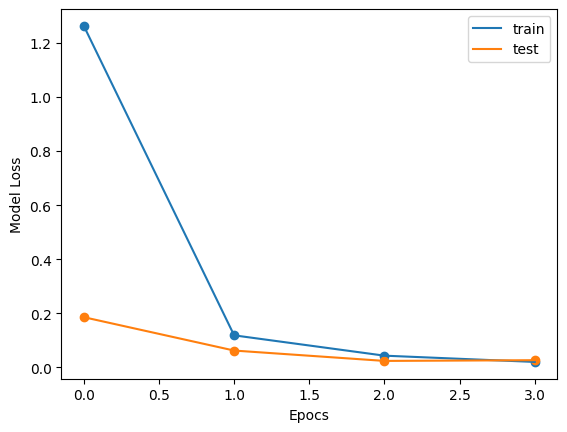

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model_history.history['loss'],label='train')
plt.scatter(range(len(model_history.history['loss'])),model_history.history['loss'])
plt.plot(model_history.history['val_loss'],label='test')
plt.scatter(range(len(model_history.history['val_loss'])),model_history.history['val_loss'])
plt.xlabel("Epocs")
plt.ylabel("Model Loss")
plt.legend();

In [ ]:
#Pickling the file
import pickle
with open('/content/drive/MyDrive/CNN Models/model.pkl', 'wb') as f:
    pickle.dump(model_history, f)

In [ ]:
import pickle
with open('/content/drive/MyDrive/CNN Models/model.pkl', 'rb') as f:
    new_model = pickle.load(f)

In [ ]:
true_emotions=[]
for i in test_data.class_indices.keys():
  true_emotions.append(i)

1/1 [==============================] - 0s 22ms/step
Emotion Detected= ANGRY


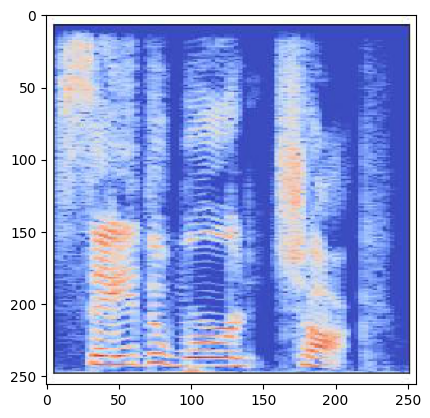

In [ ]:
#Predicting the New Image
import numpy as np
import matplotlib.pyplot as plt
path="/content/drive/MyDrive/Test_Sample_Folder/Test Data/angry/YAF_chalk_angry.jpg"

original=load_img(path,target_size=(256,256))
img=load_img(path,target_size=(256,256))

#Preprocessing the Image

pre_img=img_to_array(img)
pre_img=pre_img/255
pre_img=np.expand_dims(pre_img,axis=0)

#Predicting the Image
img_pred=model.predict(pre_img)
print("Emotion Detected=", true_emotions[img_pred.argmax()].upper())
plt.imshow(original);


#**THANK YOU**

##**Speech Emotion Recognition has various applications in different fields. Here are some examples:**

1. Healthcare: SER can be used to detect emotional distress and depression in 
patients by analyzing their speech patterns. This can help doctors and therapists identify individuals who may require additional support and treatment.

2. Customer service: SER can be used to analyze the tone and emotion in customer support calls. This can help companies identify areas where customers may be experiencing frustration or dissatisfaction and improve their customer service processes accordingly.

3. Education: SER can be used in online learning platforms to monitor the emotional state of students. This can help teachers and educators identify students who may be struggling with their coursework or experiencing emotional distress.

4. Human-Computer Interaction: SER can be used to create more natural and responsive user interfaces. For example, a voice assistant could use SER to detect the emotional state of the user and adjust its responses accordingly.

5. Entertainment: SER can be used to create more immersive and interactive gaming and virtual reality experiences. For example, games could use SER to detect the emotional state of the player and adjust the game mechanics or storyline accordingly.

Overall, SER has a wide range of potential applications in fields such as healthcare, customer service, education, human-computer interaction, and entertainment.

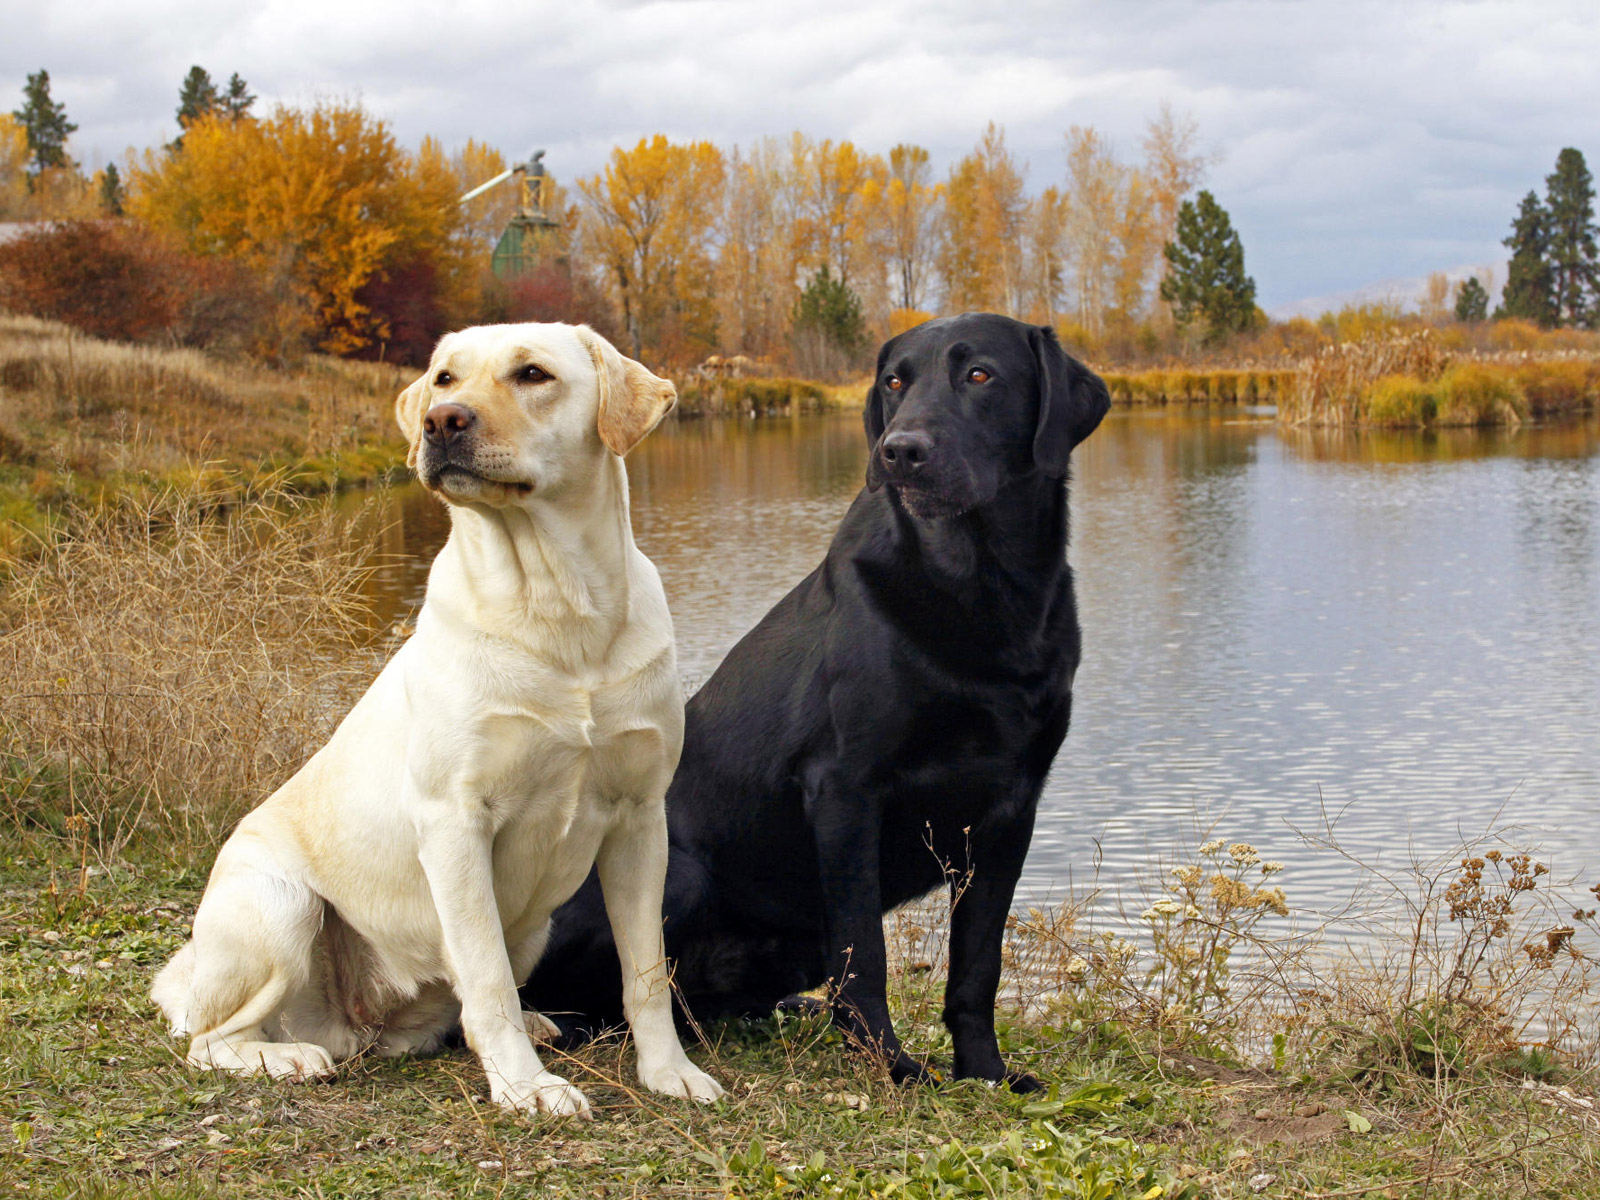

In [ ]:
from PIL import Image
Image.open('/content/drive/MyDrive/Demo Image/Original Image/Labra.jpg')

In [78]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, array_to_img, load_img
pic=load_img('/content/drive/MyDrive/Demo Image/Original Image/Labra.jpg')
pic_array=img_to_array(pic)
pic_array.shape

(1200, 1600, 3)

In [79]:
import os
path='/content/drive/MyDrive/Demo Image/Output Folder'
num_of_files=len(os.listdir(path))
num_of_files

10

In [ ]:
for i in range(num_of_files):
  rem=os.path.join(path,os.listdir(path)[i])
  os.remove(rem)

In [ ]:
pic_array=pic_array.reshape((1,)+pic_array.shape)
pic_array.shape

path='/content/drive/MyDrive/Demo Image/Original Image'
datagen=ImageDataGenerator(rotation_range=40,
                   width_shift_range=0.1,
                   height_shift_range=0.1,
                   rescale=1/255,
                   shear_range=0.2,
                   zoom_range=0.8,
                   brightness_range=[0,4],
                   horizontal_flip=True,
                   fill_mode='nearest')

count = 0
for batch in datagen.flow(pic_array, batch_size=1,
                          save_to_dir='/content/drive/MyDrive/Demo Image/Output Folder',
                          save_prefix='Labrador',
                          save_format='jpeg'):
    count += 1
    if count == 10:
        break  # Generate 10 transformed images
print("10 Images have been Generated")

10 Images have been Generated


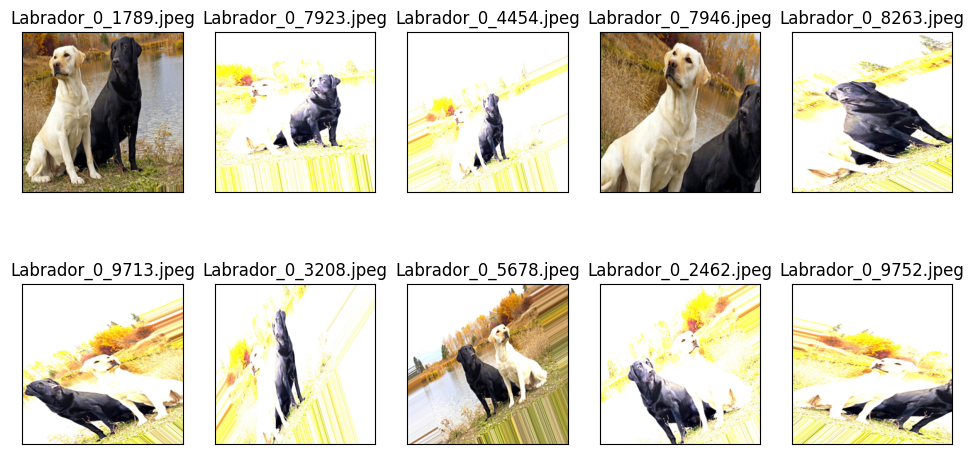

In [80]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# Set the path to the directory containing the images
image_dir = "/content/drive/MyDrive/Demo Image/Output Folder"

# Create a list of the image filenames
image_filenames = os.listdir(image_dir)

# Select the first 10 image filenames
image_filenames = image_filenames[:10]

# Create a figure with 2 rows and 5 columns of subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))

# Loop through the selected image filenames and plot each image in a subplot
for i, ax in enumerate(axes.flat):
    # Load the image and resize it to 256x256 pixels
    img = Image.open(os.path.join(image_dir, image_filenames[i]))
    img = img.resize((256, 256))

    # Plot the image in the current subplot
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(image_filenames[i])

# Display the figure
plt.show()


#**Logistic Regression**

In [81]:
from keras.preprocessing.image import ImageDataGenerator

# set up the ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# set the batch size and image size
batch_size = 250
image_size = (256, 256)

# generate the training data
train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Test_Sample_Folder/Train Data',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training')

# generate the validation data
validation_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Test_Sample_Folder/Test Data',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation')

# generate the testing data
test_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Test_Sample_Folder/Test Data',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False)

# extract the training data and labels
X_train, y_train = train_generator.next()

# extract the validation data and labels
X_val, y_val = validation_generator.next()

# extract the testing data and labels
X_test, y_test = test_generator.next()


Found 1792 images belonging to 7 classes.
Found 112 images belonging to 7 classes.
Found 560 images belonging to 7 classes.


In [82]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.linear_model import LogisticRegression

# create the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

# generate the flattened output
X_train_flattened = model.predict(X_train)
X_test_flattened = model.predict(X_test)

# create the Logistic Regression model
logreg = LogisticRegression()

# fit the model to the training data
logreg.fit(X_train_flattened, y_train)

# evaluate the model on the test data
score = logreg.score(X_test_flattened, y_test)

print("Accuracy: {:.2f}%".format(score * 100))


8/8 [==============================] - 0s 20ms/step


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 93.20%


In [86]:
X_val_flattened = X_val.reshape(X_val.shape[0], -1)
X_val_flattened.shape

(112, 196608)

In [88]:
logreg.fit(X_val_flattened, y_val)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [96]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred = logreg.predict(X_test.reshape(X_test.shape[0], -1))
accuracy_score(y_test, y_pred)

0.652

#**FINALLY THANK YOU!!!!!**